In [1]:
import numpy
from matplotlib import pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [2]:
from visualization import stacked_bar_plot, utils

In [3]:
data1 = [('ITA_1', [0.12, 0.08, 0.15, 0.20, 0.45]),
         ('FIS_2', [0.00, 0.09, 0.22, 0.44, 0.25])]

In [4]:
data2 = [('classe 1', [0.18, 0.22, 0.32, 0.14, 0.14]),
         ('classe 2', [0.11, 0.00, 0.08, 0.15, 0.66]),
         ('classe 3', [0.05, 0.00, 0.06, 0.35, 0.54])]

### Stacked bar plots

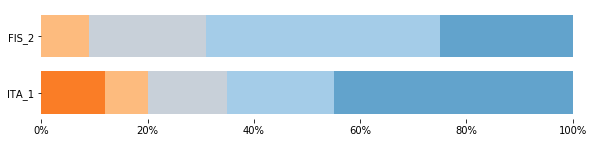

In [5]:
fig = plt.figure(figsize=(10,len(data1)))
ax = fig.add_subplot(1,1,1)
stacked_bar_plot(ax, data1)

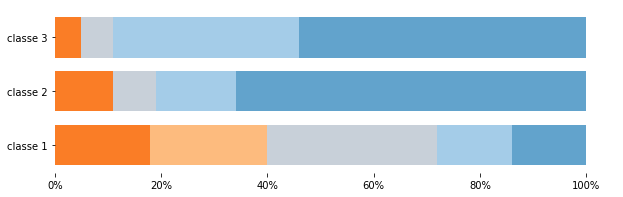

In [6]:
fig = plt.figure(figsize=(10,len(data2)))
ax = fig.add_subplot(1,1,1)
stacked_bar_plot(ax, data2)

### Divergent stacked bar plots

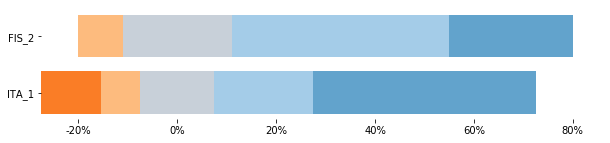

In [7]:
fig = plt.figure(figsize=(10,len(data1)))
ax = fig.add_subplot(1,1,1)
stacked_bar_plot(ax, data1, divergent=True)

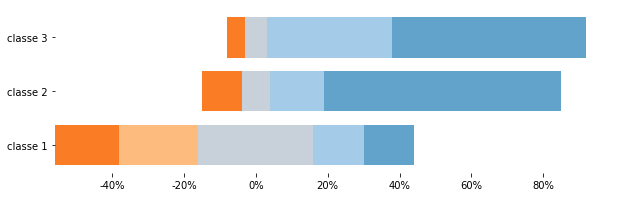

In [8]:
fig = plt.figure(figsize=(10,len(data2)))
ax = fig.add_subplot(1,1,1)
stacked_bar_plot(ax, data2, divergent=True)

### A more complex example

This adds the average satisfaction as an additional plot on the right side and compares it with the total average.
We could also add further info, such as the average per category.

In [9]:
data3 = [('A', [0.12, 0.08, 0.15, 0.20, 0.45]),
         ('B', [0.00, 0.09, 0.22, 0.44, 0.25]),
         ('C', [0.18, 0.22, 0.32, 0.14, 0.14]),
         ('D', [0.11, 0.00, 0.08, 0.15, 0.66]),
         ('E', [0.05, 0.00, 0.06, 0.35, 0.54])]

Here we calculate the average satisfactions...

In [10]:
def average(values):
    return sum( (i+1)*v for i,v in enumerate(values) )

averages = [ average(v) for l,v in data3 ]
total_avg = numpy.average(averages)

...and use them to sort the data.

In [11]:
temp = sorted(zip(averages, data3))
averages, data3 = zip(*temp)

Finally, the plot:

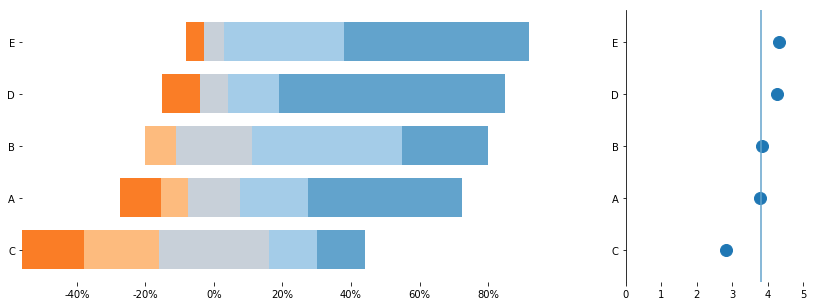

In [12]:
fig = plt.figure(figsize=(14,len(data3)))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
ax1 = plt.subplot(gs[0])
stacked_bar_plot(ax1, data3, divergent=True)

ax2 = plt.subplot(gs[1])
utils.despine(ax2, ['top', 'bottom', 'right'])
labels, values = zip(*data3)
ind = numpy.arange(len(labels))
ax2.set_yticks(ind)
ax2.set_yticklabels(labels)
ax2.set_xlim(0, 5)
ax2.set_ylim(ax1.get_ylim())
ax2.plot(averages, ind, 'o', markersize=12)

_ = ax2.axvline(total_avg, color='#62a3cc')